### Enumeration

In [ ]:
public class IntCounterEnumeratorWithoutIEnumerator
{
    private int[] items;
    private int position = -1;

    public IntCounterEnumeratorWithoutIEnumerator(int counter)
    {
        items = new int[counter];
        for (int i = 0; i < counter; i++)
            items[i] = i + 1;
        //position = 0;
    }

    public int Current
    {
        get
        {
            try
            {
                return items[position];
            }
            catch (IndexOutOfRangeException)
            {
                throw new InvalidOperationException();
            }
        }
    }

    public bool MoveNext()
    {
        position++;
        return (position < items.Length);
    }
}

var countEnumerator = new IntCounterEnumeratorWithoutIEnumerator(20);
while (countEnumerator.MoveNext())
    Console.WriteLine(countEnumerator.Current);

An ***enumerator*** is a read-only, forward-only `cursor` over a `sequence of values`.

a type as an ***enumerator*** if it does any of the following:

- Has a `public` parameterless method named `MoveNext` and property called `Current`  
 
- Implements `System.Collections.Generic.IEnumerator<T> ` 

- Implements `System.Collections.IEnumerator`

In [2]:
public class IntCounterEnumerator : IEnumerator<int>
{
    private int[] items;
    private int position = -1;

    public IntCounterEnumerator(int counter)
    {
        items = new int[counter];
        for (int i = 0; i < counter; i++)
            items[i] = i + 1;
    }

    public int Current
    {
        get
        {
            try
            {
                return items[position];
            }
            catch (IndexOutOfRangeException)
            {
                throw new InvalidOperationException();
            }
        }
    }

    object IEnumerator.Current => Current;

    public void Dispose()
    {
        Reset();
    }

    public bool MoveNext()
    {
        position++;
        return (position < items.Length);
    }

    public void Reset()
    {
        position = -1;
    }
}

The ***foreach*** statement `iterates` over an `enumerable` object.

type as ***enumerable*** if it does any of the following:  

- Has a `public` parameterless method named `GetEnumerator` that returns an `enumerator`  
  
- Implements `System.Collections.Generic.IEnumerable<T> ` 
  
- Implements `System.Collections.IEnumerable`  

- (From C# 9) Can bind to an `extension method` named `GetEnumerator` that returns an `enumerator`


In [3]:
public class IntCounter : IEnumerable<int>
{
    private int _counter;

    public IntCounter(int count)
    {
        _counter = count;
    }

    public int Counter => _counter;

    public IEnumerator<int> GetEnumerator()
    {
        return new IntCounterEnumerator(_counter);
    }

    IEnumerator IEnumerable.GetEnumerator()
    {
        return GetEnumerator();
    }
}

var counter = new IntCounter(20);

foreach (var count in counter)
    Console.WriteLine(count);

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [ ]:
foreach (char c in "beer")
    Console.WriteLine (c);

using (var enumerator = "beer".GetEnumerator())
{
    while (enumerator.MoveNext())
    {
        var element = enumerator.Current;
        Console.WriteLine (element);
    }
}


### Collection Initializers

In [ ]:
List<int> list = new List<int> {1, 2, 3};

In [ ]:
//The compiler translates this to the following:

List<int> list = new List<int>();
list.Add (1);
list.Add (2);
list.Add (3);

In [ ]:
var dict = new Dictionary<int, string>()
{
{ 5, "five" },
{ 10, "ten" }
};

### Iterators

`foreach` statement is a `consumer` of an `enumerator`  
  
> ***iterator*** is a `producer` of an `enumerator`

In [ ]:
IEnumerable<int> Fibs (int fibCount)
{
    for (int i = 0, prevFib = 1, curFib = 1; i < fibCount; i++)
    {
        yield return prevFib;
        int newFib = prevFib+curFib;
        prevFib = curFib;
        curFib = newFib;
    }
}

foreach(var item in Fibs(20))
{
    Console.WriteLine(item);
}

In [ ]:
//yield can return IEnumerator
IEnumerator<int> Fibs (int fibCount)
{
    for (int i = 0, prevFib = 1, curFib = 1; i < fibCount; i++)
    {
        yield return prevFib;
        int newFib = prevFib+curFib;
        prevFib = curFib;
        curFib = newFib;
    }
}

<div dir="rtl" style="width: 90%; margin: auto;">
<p>
<code>return</code> می گوید : این مقداری است که از من خواستید از این تابع برگردانم
<p>
<p>
<code>yeild return</code> می گوید : این عنصر بعدی است که از من خواستید از این شمارشگر برگردانم
<p>
</div>

On each ***yield statement***, `control` is `returned` to the `caller`, but the callee’s state is `maintained` so that the method can continue executing as soon as the caller enumerates the next element.

***compiler*** converts `iterator` methods into private classes that ***implement*** `IEnumerable<T>` and/or `IEnumerator<T>`.

### Iterator Semantics

An ***iterator*** is a `method`, `property`, or `indexer` that contains **one** or **more** `yield` statements.

An ***iterator*** must return one of the following four interfaces  
- `System.Collections.IEnumerable`  
- `System.Collections.Generic.IEnumerable<T>`  
- `System.Collections.IEnumerator`  
- `System.Collections.Generic.IEnumerator<T>`

In [ ]:
IEnumerable<string> Foo()
{
    yield return "One";
    yield return "Two";
    yield return "Three";
}

foreach (string s in Foo())
Console.WriteLine(s); // Prints "One","Two","Three"

#### yield break

In [ ]:
//you can't use return in iterator
//instead you must use the `yield break`

IEnumerable<string> Foo (bool breakEarly)
{
    yield return "One";
    yield return "Two";
    if (breakEarly)
        yield break;
    yield return "Three";
}

#### Iterators and try/catch/finally blocks

In [ ]:
//A yield return statement cannot appear in a try block that has a catch clause:

//because he compiler must translate iterators into ordinary classes
//with MoveNext, Current, and Dispose members

IEnumerable<string> Foo()
{
    try { yield return "One"; } // Illegal
    catch {  }
}

In [ ]:
//this is ok, because The code in the finally block executes when 
//the consuming enumerator reaches the end of the sequence or is disposed.

IEnumerable<string> Foo()
{
    try { yield return "One"; } // OK
    finally {  }
}

### Composing Sequences

In [ ]:
IEnumerable<int> Fibs (int fibCount)
{
    for (int i = 0, prevFib = 1, curFib = 1; i < fibCount; i++)
    {
        yield return prevFib;
        int newFib = prevFib+curFib;
        prevFib = curFib;
        curFib = newFib;
    }
}

IEnumerable<int> EvenNumbersOnly (IEnumerable<int> sequence)
{
    foreach (int x in sequence)
        if ((x % 2) == 0)
            yield return x;
}

foreach (int fib in EvenNumbersOnly (Fibs(6)))
    Console.WriteLine (fib);

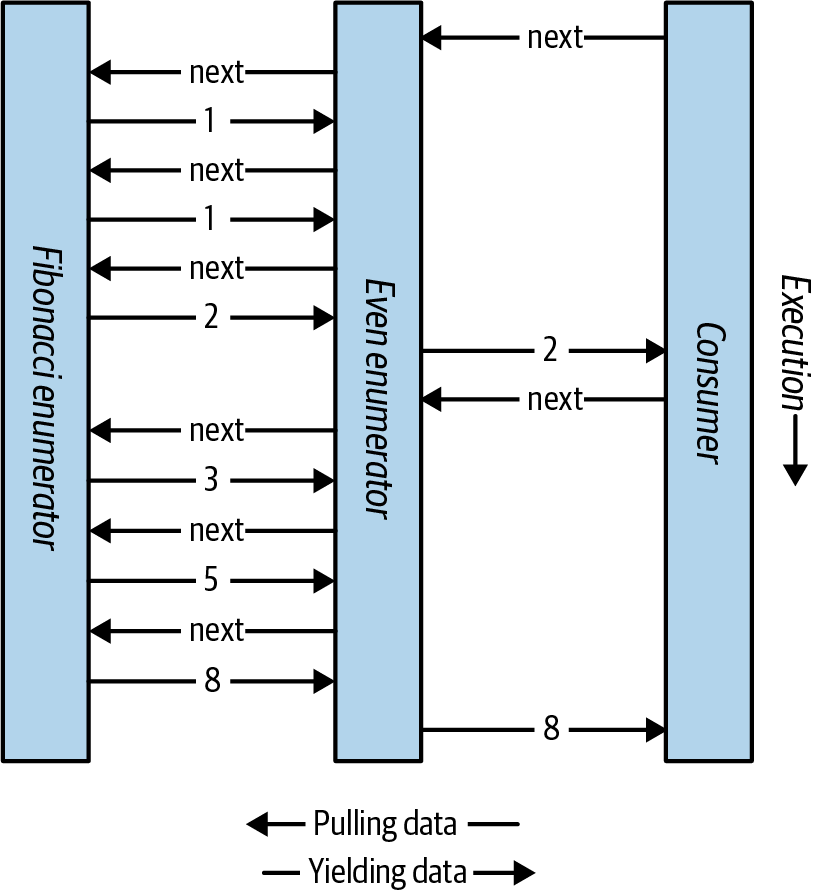